## Business Problem

As a marketing agency, our primary object is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our strategies to deliver better outcomes for our clients.


## Research Question

Which ad platform is more effective in terms of conversions, clicks, and overall cost-effective?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\datasets\Facebook vs Adwards ad dataset.csv")
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2023,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30
1,1/2/2023,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2023,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2023,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2023,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40


In [3]:
df.shape

(365, 17)

In [4]:
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [5]:
#converting date from object to datetime--
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                       object
Facebook Click-Through Rate (Clicks / View)                object
Facebook Conversion Rate (Conversions / Clicks)            object
Facebook Cost per Click (Ad Cost / Clicks)                 object
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                        object
AdWords Click-Through Rate (Clicks / View)                 object
AdWords Co

In [7]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2023-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2023-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2023-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2023-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2023-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2023-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


From this statistical description we can see from the mean that Adwards has more views and clicks compared to the Facebook but the important one is conversion. Where we can see Facebook's conversion average is higher though it has low views and clicks.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             365 non-null    datetime64[ns]
 1   Facebook Ad Campaign                             365 non-null    object        
 2   Facebook Ad Views                                365 non-null    int64         
 3   Facebook Ad Clicks                               365 non-null    int64         
 4   Facebook Ad Conversions                          365 non-null    int64         
 5   Cost per Facebook Ad                             365 non-null    object        
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object        
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object        
 8   Facebook Cost per Click (Ad Cost / Click

All 365 values.............Means no null value present.

## Comparing Campaigns Performance

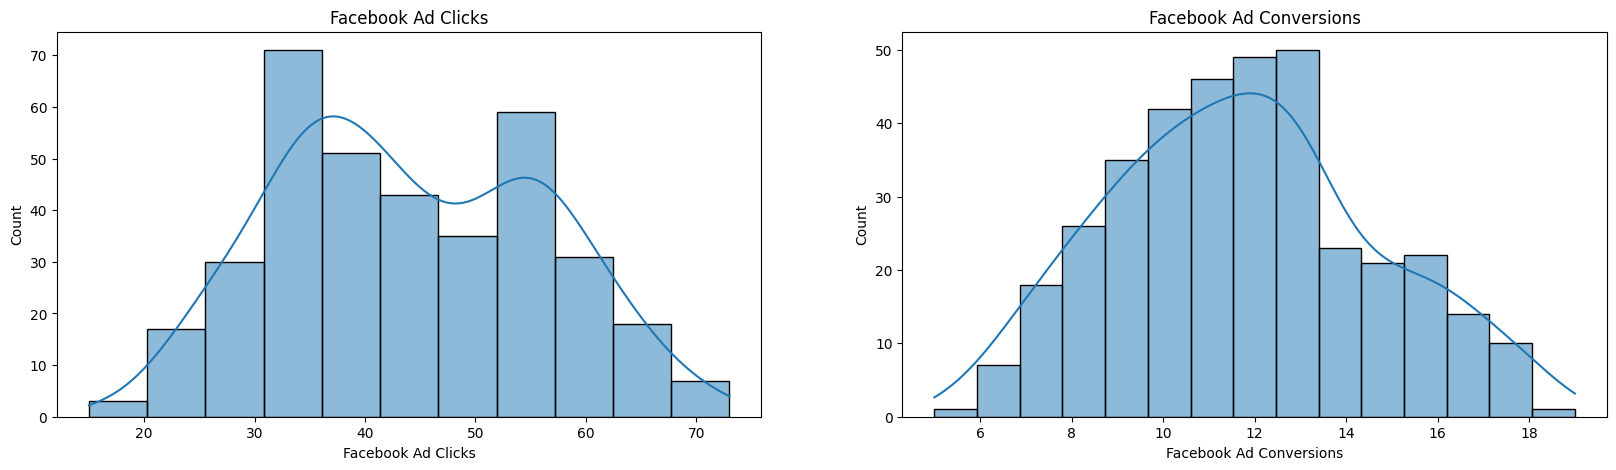

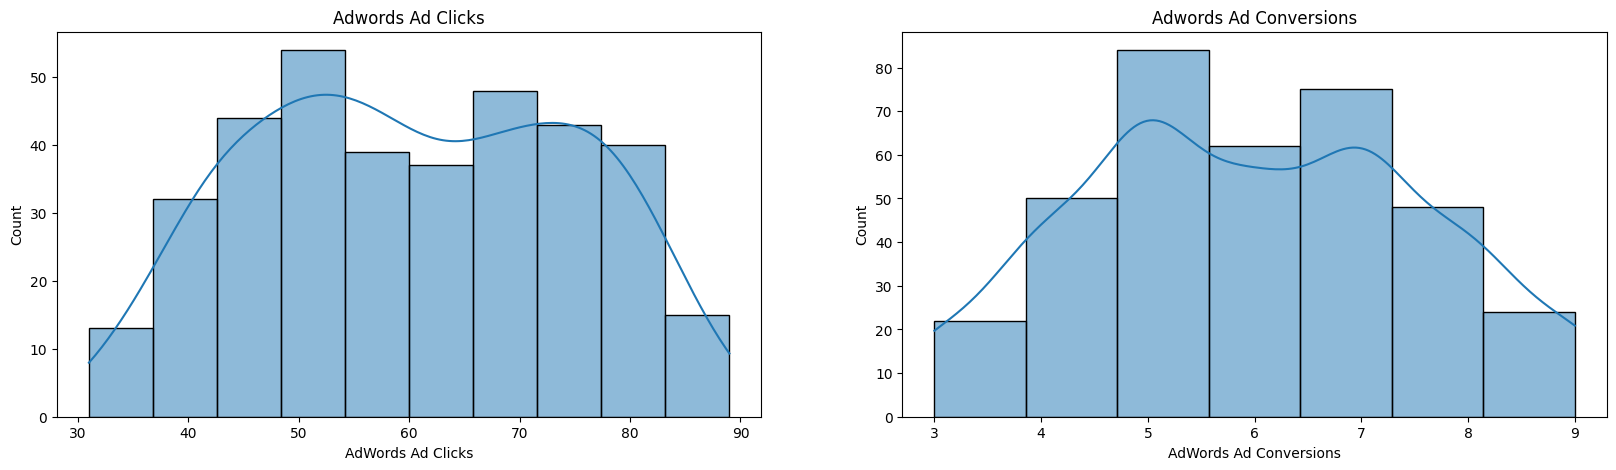

In [9]:
#distribution of clicks and conversions
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Facebook Ad Clicks")
sns.histplot(df["Facebook Ad Clicks"],kde = True)
plt.subplot(1,2,2)
plt.title("Facebook Ad Conversions")
sns.histplot(df["Facebook Ad Conversions"],bins = 15,kde = True)
plt.show()


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Adwords Ad Clicks")
sns.histplot(df["AdWords Ad Clicks"],kde = True)
plt.subplot(1,2,2)
plt.title("Adwords Ad Conversions")
sns.histplot(df["AdWords Ad Conversions"],bins= 7,kde = True)
plt.show()

We can see from the graph that the gistogram plots are symetrical and that means no outlier is present. Data points are almost evenly distributed.

#### how frequently do we observe days with high numbers of conversions compared to days with low number of conversions?

In [10]:
# Creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('Less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('11 - 15')
        else:
            category.append('More than 15')
    return category

# applying function for facebook and adwords' conversions
df["Facebook Conversions Category"] = create_conversion_category("Facebook Ad Conversions")
df["AdWords Conversions Category"] = create_conversion_category("AdWords Ad Conversions")

In [11]:
df[["Facebook Ad Conversions","Facebook Conversions Category","AdWords Ad Conversions","AdWords Conversions Category"]].head()

,Facebook Ad Conversions,Facebook Conversions Category,AdWords Ad Conversions,AdWords Conversions Category
0,8,6 - 10,5,Less than 6
1,12,11 - 15,6,6 - 10
2,8,6 - 10,4,Less than 6
3,9,6 - 10,5,Less than 6
4,7,6 - 10,7,6 - 10


In [12]:
df['Facebook Conversions Category'].value_counts()

Facebook Conversions Category
11 - 15         189
6 - 10          128
More than 15     47
Less than 6       1
Name: count, dtype: int64

In [13]:
df['AdWords Conversions Category'].value_counts()

AdWords Conversions Category
6 - 10         209
Less than 6    156
Name: count, dtype: int64

In [14]:
facebook = pd.DataFrame(df['Facebook Conversions Category'].value_counts()).reset_index().rename(columns = {"Facebook Conversions Category":"Category"})
facebook

,Category,count
0,11 - 15,189
1,6 - 10,128
2,More than 15,47
3,Less than 6,1


In [15]:
adwords = pd.DataFrame(df['AdWords Conversions Category'].value_counts()).reset_index().rename(columns = {"AdWords Conversions Category":"Category"})
adwords

,Category,count
0,6 - 10,209
1,Less than 6,156


In [16]:
category_df = pd.merge(facebook,adwords, on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,11 - 15,189,0.0
1,6 - 10,128,209.0
2,Less than 6,1,156.0
3,More than 15,47,0.0


In [17]:
category_df = category_df.iloc[[2,1,0,3]]

In [18]:
category_df

,Category,count_x,count_y
2,Less than 6,1,156.0
1,6 - 10,128,209.0
0,11 - 15,189,0.0
3,More than 15,47,0.0


In [19]:
category_df.rename(columns = {'count_x':'Facebook','count_y':'AdWords'},inplace=True)
category_df

,Category,Facebook,AdWords
2,Less than 6,1,156.0
1,6 - 10,128,209.0
0,11 - 15,189,0.0
3,More than 15,47,0.0


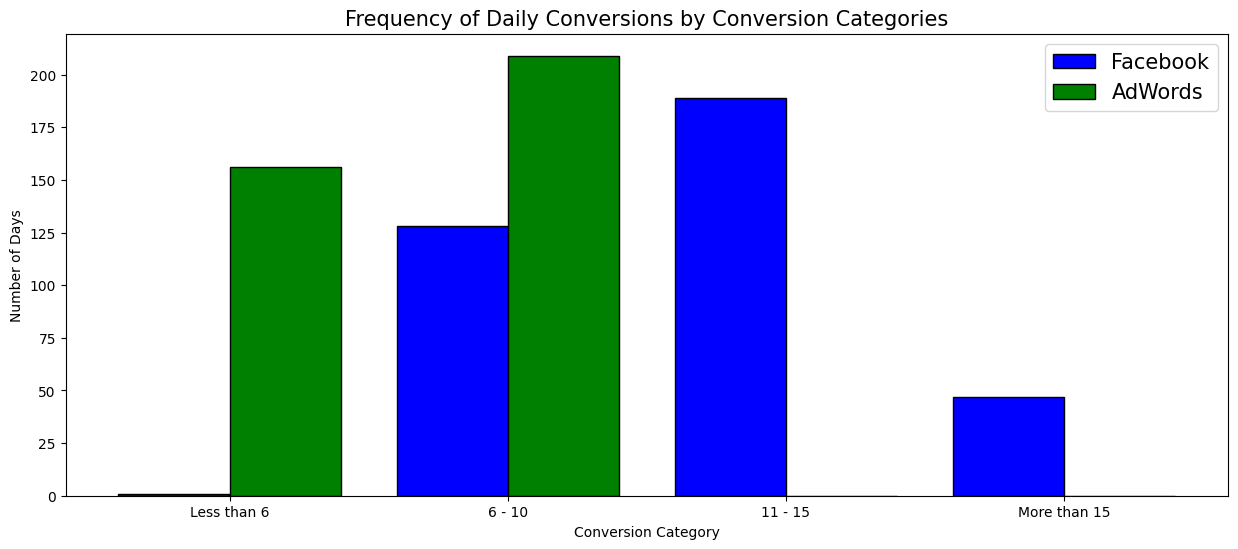

In [20]:
X_axis = np.arange(len(category_df))
plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, category_df['Facebook'], 0.4, label = 'Facebook', color = 'blue',edgecolor = 'k')
plt.bar(X_axis + 0.2, category_df['AdWords'], 0.4, label = 'AdWords', color = 'green',edgecolor = 'k')


plt.xticks(X_axis, category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of Days")
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

* The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6-10).
* There is a significant variance in the number of high-conversion days between two different campaings.
* The absence of any days with conversions between 10-15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

#### Do more clicks on the ad really lead to conversions?

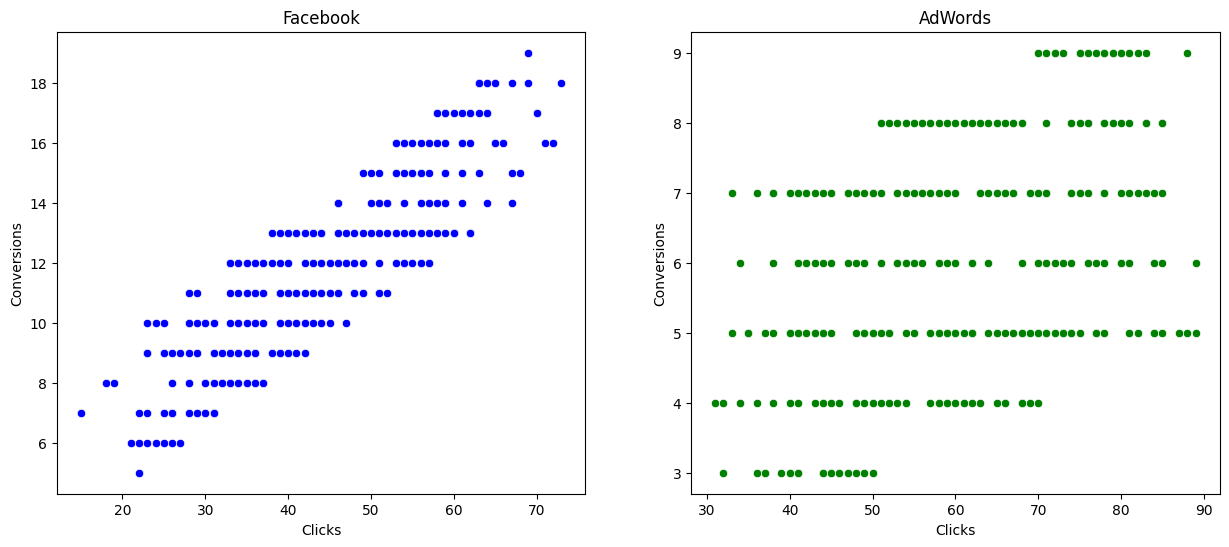

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'], y = df['Facebook Ad Conversions'], color = 'blue')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'], y = df['AdWords Ad Conversions'], color = 'Green')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [22]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [23]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [24]:
print('Correlation Coefficient \n----------------------')
print('Facebook :',round(facebook_corr.values[0,1],2))
print('AdWords :',round(adwords_corr.values[0,1],2))

Correlation Coefficient 
----------------------
Facebook : 0.87
AdWords : 0.45


* A correlation coefficient of 0.87 indicates a strong positive relationship between clicks on Facebook ads and conversions. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.
* This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.
* This strong correlation between Facebook ads and conversions suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.
* A correlation coefficient of 0.45 indicates a moderate positive relation between clicks on AdWords ads and conversions. While there is still a positive relationship, it is not as strong as with Facebook ads. It does contribute to sales but its effectiveness may be influenced by other factors.

# Regression Analysis -

#### What will happen when we go with Facebook Ad? How many Facebook Ad conversions can we expect given a certain number of ad clicks?

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
# Independent Varieble
X = df[['Facebook Ad Clicks']]

# Dependent Varieble
y = df[['Facebook Ad Conversions']]

# fitting the model
lr.fit(X,y)
pred = lr.predict(X)

# evaluation of model
r2 = r2_score(y,pred)*100
mse = mean_squared_error(y,pred)
print("Accuracy(R2 Score) :",round(r2,2),'%')
print('Mean Squared Error :',round(mse,2))

Accuracy(R2 Score) : 76.35 %
Mean Squared Error : 2.02


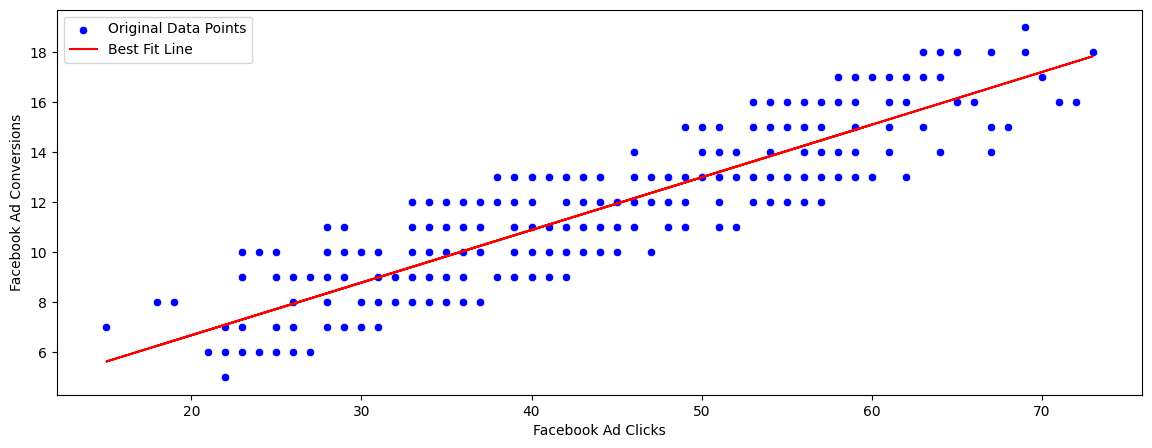

In [27]:
plt.figure(figsize = (14,5))
sns.scatterplot(x = df['Facebook Ad Clicks'], y = df['Facebook Ad Conversions'], color = 'blue', label = 'Original Data Points')
plt.plot(df['Facebook Ad Clicks'], pred, color = 'red', label = 'Best Fit Line')
plt.legend()
plt.show()

In [28]:
print(f"For {50} Clicks, Expected Conversion : {round(lr.predict([[50]])[0][0],0)}")

For 50 Clicks, Expected Conversion : 13.0


## Predict your conversion

In [29]:
a = int(input("Write the clicks number for getting predicted"))
print(f"For {a} Clicks, Expected Conversion : {round(lr.predict([[a]])[0][0],0)}")

Write the clicks number for getting predicted 200


For 200 Clicks, Expected Conversion : 45.0


* The model has a reasonably good predictive power, with an R2 score of 76.35%. This suggests that it can predict Facebook ad conversions almost 76% accurate based on the number of Facebook ad clicks.
* With the insights provided by the Linear Regreassion model, business can make informed decisions about resource allocation, budget planning, and campaign optimization.
* Knowing the expected number of Facebook ad conversions based on a certain number of ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook Advertising effort. 